In [11]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# 2. Fundamentos de imágenes digitales



Esta unidad es una introducción a una serie de conceptos básicos en el procesamiento de imágenes digitales.

* Algunos aspectos importantes del sistema visual humano, incluida la formación de imágenes en el ojo y sus capacidades de adaptación y discriminación del brillo. 

* La luz, otros componentes del espectro electromagnético y sus características de imagen. 

* Los sensores de imágenes y cómo se utilizan para generar imágenes digitales. 

* Los conceptos de muestreo uniforme de imágenes y cuantificación de intensidad. 

    * Representación de imágenes digitales, 
    * los efectos de variar el número de muestras y los niveles de intensidad en una imagen, 
    * los conceptos de resolución espacial y de intensidad, 
    * y los principios de interpolación de imágenes. 

* Relaciones básicas entre píxeles. 

* Una introducción a las principales herramientas matemáticas que utilizamos después. 

## 2.1. Elementos de la percepción visual


Aunque el campo de procesamiento de imágenes está construido en fundamentos matemáticos, el análisis y la intuición humana muchas veces juegan un papel en la selección de una técnica contra otra.

Por ello, entender las características básicas de la percepción humana es un primer paso en nuestra jornada hacia el procesamiento de imágenes.

### 2.1.1. Estructura del ojo humano



La retina cuenta con dos tipos de receptores: conos y bastones

Hay entre 6 y 7 millones de conos en cada ojo. Se encuentran localizados principalmente en la porción central de la retina, llamada fovea, y que es altamente sensible al color

Los humanos podemos resolver detalles finos debido a que cada cono está conectado a su propia terminal nerviosa

La visión proporcionada por los conos es llamada fotópica o visión de luz brillante

Contamos con un número mucho más grande de bastones, entre 75 y 150 millones se encuentran distribuidos en la retina

<center><img width=600 src='figs/ojo.png'>

<center><img width=600 src='figs/conos_bastones.png'>

### 2.1.2. Formación de la imagen en el ojo humano

<center>
<img width=600 src='figs/formacion.png'>

## 2.2. La luz y el espectro electromagnético


En 1666, Sir Isaac Newton descubrió que cuando un rayo de luz solar pasa a través de un prisma de vidrio, el rayo de luz que emerge no es blanco sino que consiste en un espectro continuo de colores que van desde el violeta en un extremo hasta el rojo en el otro.

La gama de colores que percibimos en la luz visible es una pequeña porción del espectro electromagnético. 

En un extremo del espectro están las ondas de radio con longitudes de onda miles de millones de veces más largas que las de la luz visible. En el otro extremo del espectro se encuentran los rayos gamma con longitudes de onda millones de veces más pequeñas que las de la luz visible.

<center><img width=600 src='figs/espectro.png'>

$$ \lambda = \frac{c}{f}$$

- $\lambda$ es la longitud de onda (m)
- $c$ es la velocidad de la luz ($2.998×10^8$ m/s)
- $f$ es la frecuencia (Hz)


$$ E = hf $$

- $E$ es la energía (eV)
- $h$ es la constante de Planck ($6.626174×10^{−27}$)


## 2.3. Adquisición y sensado de imagen

### 2.3.1. Sensores

Sensor simple y sensor lineal

<center><img width=600 src='figs/sensores_1.png'>


Matriz de sensores

<center><img width=600 src='figs/sensores_2.png'>


Sensor rotativo

<center><img width=600 src='figs/sensores_3.png'>


Arreglos de sensores

<center><img width=600 src='figs/arreglos.png'>


### 2.3.2. Modelo simple para la formación de imágenes


$$ f(x,y) = i(x,y) r(x,y)$$

- $ 0 \leq f(x,y) < \infty$
- $ x,y $ son coordenadas en el espacio de la imagen
- $ 0 \leq i(x,y) < \infty$ es la función de iluminación, determinada por la fuente de iluminación
- $ 0 \leq r(x,y) \leq 1 $ es la función de reflectancia, determinada por las características del objeto

$$ \ell = f(x,y) $$

- $ L_{min} \leq \ell \leq L_{max} $
    * $ L_{min} = i_{min} r_{min} $ es NO negativa
    * $ L_{max} = i_{max} r_{max} $ es finita

## 2.4. Cuantización y muestreo de imágenes


* La salida de la mayoría de los sensores es un voltaje contino cuya amplitud y comportamiento espacial están relacionados con el fenómeno físico que está sensando.

* Para crear una imagen digital, necesitamos convertir los datos continuos en un formato digital. 

* Esto requiere dos procesos: muestreo y cuantización.


<center><img width=600 src='figs/aspectos_basicos.png'>


### 2.4.1. Resolución espacial


* Depende de la frecuencia de muestreo. 

* Es el número de elementos por unidad de longitud.


### 2.4.2. Resolución espectral



* Depende de la cantidad de niveles de cuantización. 

* Es el número máximo de niveles posible que puede tener cada elemento en una imagen una vez digitalizada.


Resolución espacial y espectral

<center><img width=600 src='figs/resoluciones.png'>


### 2.4.3. Representación de imágenes digitales



* El resultado del muestreo y la cuantización es una matriz de números reales. 

* Los valores de las coordenadas de origen son (𝑥,𝑦)=(0,0). 

* Los siguientes valores a lo largo de la primera fila son: (𝑥,𝑦)=(0,1);(0,2);(0,3);…

* Éstos no son valores reales de las coordenadas físicas cuando la imagen fue muestreada, sino los de la segunda (tercera, cuarta) muestra a lo largo de la primera fila. 


* De acuerdo a esta mutación, en el caso de una imagen de M filas y columnas, la imagen digital se puede representar como sigue:

$$
f(x,y) = 
\begin{bmatrix}
f(0,0) & f(0,1) & \cdots & f(0,N-1)\\
f(1,0) & f(1,1) & \cdots & f(1,N-1)\\
\vdots & \vdots &        & \vdots \\
f(M-1,0) & f(M-1,1) & \cdots & f(M-1,N-1)
\end{bmatrix}
$$

* Otra forma de representar el modelo es a través de una matriz

$$
A = 
\begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,N-1}\\
a_{1,0} & a_{1,1} & \cdots & a_{1,N-1}\\
\vdots & \vdots &        & \vdots \\
a_{M-1,0} & a_{M-1,1} & \cdots & a_{M-1,N-1}
\end{bmatrix}
$$

<center><img width=600 src='figs/representacion.png'>


<center><img width=600 src='figs/representaciones_2.png'>


* Los niveles de quantización permitidos para cada pixel se representan por el número entero 𝐿. 

* Normalmente, con fines de facilitar el procesamiento, el almacenamiento y el muestreo, este número es, típicamente, una potencia de 2, es decir: 
    * $𝐿=2^k$


* 𝑘 es el número de bits que se emplearán en la representación de los niveles
* que representa valores igualmente espaciados y enteros en el intervalo $[0,𝐿−1]$


* Sea $I_(M \times N)$ una imagen de $M$ filas y $N$ columnas
* Entonces, el número de bits necesarios para almacenar dicha imagen es

    * $ b = MNk $
    * $ b = kN^2 $ si $ M=N$



<center><img src='figs/grafica_bytes.png' width=600>

### 2.4.4. Indexado lineal contra coordenadas



La convención en la que la ubicación de un píxel está dada por sus coordenadas bidimensionales, se conoce como indexación de coordenadas o indexación de subíndices. 

Otro tipo de indexación que se utiliza ampliamente en la programación de algoritmos de procesamiento de imágenes es la indexación lineal, que consiste en una cadena unidimensional de números enteros no negativos basada en el cálculo de compensaciones de las coordenadas (0, 0). 

Hay dos tipos principales de indexación lineal, uno se basa en un escaneo de filas de una imagen y el otro en un escaneo de columnas.

La idea es escanear una imagen columna por columna, comenzando en el origen y avanzando hacia abajo y luego hacia la derecha. El índice lineal se basa en contar píxeles a medida que escaneamos la imagen como se muestra en la figura

<center><img src='figs/linear_index.png' width=600>

La fórmula para generar índices lineales basados en un escaneo de columnas es sencilla y puede determinarse mediante inspección. Para cualquier par de coordenadas (x, y), el valor del índice lineal correspondiente es:

$$
    \begin{matrix}
        \alpha = My+x \\
        x = \alpha \mod M \\
        y = \frac{( \alpha - x )}{M}
    \end{matrix}
$$


### 2.4.5. Resolución espacial e intensidad



Intuitivamente, la resolución espacial es la medida de lo más pequeño que se puede describir en una imagen. Cuantitativamente, la resolución espacial puede ser definida de varias formas: con *pares de líneas por unidad de distancia*, y *puntos por unidad de distancia* son los más comunes.


<center><img src='figs/spatial_res.png' width=600>

La resolución de intensidad se refiere de manera similar al cambio más pequeño discernible en el nivel de intensidad. 

Según consideraciones de hardware, el número de niveles de intensidad suele ser una potencia entera de dos. El número más común es de 8 bits, aunque se utilizan 16 bits en algunas aplicaciones en las que es necesario mejorar rangos de intensidad específicos. La cuantificación de intensidad utilizando 32 bits es poco común.


<center><img width=600 src='figs/intensity_res2.png'>

A diferencia de la resolución espacial, que debe basarse en una base por unidad de distancia para que sea significativa, es una práctica común referirse al número de bits utilizados para cuantificar la intensidad como “resolución de intensidad”. 

Por ejemplo, es común decir que una imagen cuya intensidad está cuantificada en 256 niveles tiene 8 bits de resolución de intensidad. Sin embargo, tenga en cuenta que los cambios discernibles de intensidad también están influenciados por los valores de ruido y saturación, y por las capacidades de la percepción humana para analizar e interpretar detalles en el contexto de una escena completa. 

### 2.4.6. Interpolación de imágenes

La interpolación se utiliza en tareas como hacer zoom, reducir, rotar y corregir geométricamente imágenes digitales. Por ahora la aplicaremos al cambio de tamaño de imágenes (reducción y zoom), que son básicamente métodos de remuestreo de imágenes. 

La interpolación es el proceso de utilizar datos conocidos para estimar valores en ubicaciones desconocidas. 



* Supongamos que una imagen de tamaño 500 * 500 píxeles debe ampliarse 1,5 veces a 750 * 750 píxeles. 

    * Una forma sencilla de visualizar el zoom es crear una cuadrícula imaginaria de 750 * 750 con el mismo espaciado de píxeles que la imagen original y luego reducirla para que se superponga exactamente a la imagen original. 
    * Obviamente, el espacio entre píxeles en la cuadrícula reducida de 750 * 750 será menor que el espacio entre píxeles en la imagen original. 
    * Para asignar un valor de intensidad a cualquier punto de la superposición, buscamos su píxel más cercano en la imagen original subyacente y asignamos la intensidad de ese píxel al nuevo píxel en la cuadrícula de 750 * 750. 
    * Cuando se han asignado intensidades a todos los puntos en la cuadrícula superpuesta, la expandimos nuevamente al tamaño especificado para obtener la imagen redimensionada.


Este método se llama interpolación del vecino más cercano, porque asigna a cada nueva ubicación la intensidad de su vecino más cercano en la imagen original. Este enfoque es simple pero tiende a producir artefactos indeseables, como una distorsión severa de los bordes rectos. 

Un enfoque más adecuado es la interpolación bilineal, en la que utilizamos los cuatro vecinos más cercanos para estimar la intensidad en una ubicación determinada. 

El siguiente nivel de complejidad es la interpolación bicúbica, que involucra a los dieciséis vecinos más cercanos de un punto.

<center><img width=600 src='figs/interpolation1.png'>

## 2.5. Relaciones básicas entre pixeles

### 2.5.1. Vecinos de un pixel


Un pixel $p$ en las coordenadas $(x,y)$ tiene dos vecinos horizontales y dos vecinos verticales con coordenadas:

$$
N_4(p) = \{(x+1,y),(x-1,y),(x,y+1),(x,y-1)\}
$$

A este conjunto de pixeles se le llama el conjunto de 4-vecinos de $p$, y se denota por $N_4(p)$

Pero tiene otros cuatro vecinos diagonales, denotado $N_D(p)$:

$$
N_D(p) = {(x+1,y+1),(x-1,y-1),(x-1,y+1),(x+1,y-1)}
$$

Estos vecinos, junto con los otros cuatro, se llaman los 8-vecinos de $p$, denotado por:

$$
N_8(p) = N_4(p) \cup N_D(p)
$$

El conjunto de ubicaciones de imágenes de los vecinos de un punto $p$ se llama vecindad de $p$. Se dice que el vecindario está cerrado si contiene a $p$. De lo contrario, se dice que el vecindario está abierto.

### 2.5.2. Adyacencia, conectividad, regiones y límites


#### Adyacencia

Sea $V$ El conjunto de valores de intensidad utilizados para definir la adyacencia. Por ejemplo, en una imagen binaria $V=\{ 1 \}$

* 4-adyacencia: $p$ y $q$ son 4-adyacentes si $q \in N_4(p)$ 
* 8-adyacencia: $p$ y $q$ son 4-adyacentes si $q \in N_8(p)$ 
* m-adyacencia (también llamada adyacencia mixta): $p$ y $q$ son m-adyacentes si:
    * $ q \in N_4(p) $ o
    * $ q \in N_D(p) $ y $ N_4(p) \cap N_4(q) $ no tienen pixeles con valores en $V$

#### Conectividad

Un camino (o curva) del pixel $p$ con coordenadas $(x_0, y_0)$, al pixel $q$ con coordenadas $(x_n, y_n)$, es una secuencia de pixeles distintos con coordenadas

$$
(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n)
$$

dónde los puntos $(x_i, y_i)$ y $(x_{i-1}, y_{i-1})$ son adyacentes para $ 1\leq i \leq n$. Donde $n$ es la longitud de el camino.

Si $(x_0, y_0)=(x_n, y_n)$ el camino es un *camino cerrado*.

Se pueden definir $4$, $8$ o $m$-caminos, dependiendo del tipo de adyacencia que se utilice.

Sea $S$ un subconjunto de píxeles de una imagen. Se dice que dos píxeles $p,q \in S$ están conectados en $S$ si existe un camino entre ellos que consta enteramente de píxeles en $S$. 

Para cualquier píxel $p \in S$, el conjunto de píxeles que están conectados a él en $S$ se denomina componente conectado de $S$. Si solo tiene un componente y ese componente es conexo, entonces $S$ se llama conjunto conexo.

#### Regiones

Sea $R$ un subconjunto de píxeles de una imagen. Llamamos a $R$ una región de la imagen si $R$ es un conjunto conexo. 

* Dos regiones $R_i$ y $R_j$ son adyacentes si su unión forma un conjunto conexo. 
* Las regiones que no son adyacentes son disjuntas. 
* Consideramos las 4 y 8 adyacencias cuando nos referimos a regiones. 

Supongamos que una imagen contiene $K$ regiones disjuntas, $R_k,k =1,2,...,K$, ninguna de las cuales toca el borde de la imagen. Sea $R_u$ la unión de todas las $K$ regiones, y sea $(R_u )^c$ su complemento. 

* Llamamos a todos los puntos en $R_u$ primer plano (*foreground*) y 
* a todos los puntos en $(R_u)^c$ el fondo de la imagen (*background*).

#### Límites

El límite (también llamado borde o contorno) de una región $R$ es el conjunto de píxeles en $R$ que son adyacentes a píxeles en el complemento de $R$. 

Dicho de otra manera, el borde de una región es el conjunto de píxeles en la región que debe tener al menos un vecino del fondo. 

La definición anterior define el borde interior de la región para distinguirla de su borde exterior, que es el borde correspondiente en el fondo. 


Si $R$ resulta ser la imagen completa, entonces su límite (o borde) se define como el conjunto de píxeles en la primera y última fila y columna de la imagen. 

Esta definición adicional es necesaria porque una imagen no tiene vecinos más allá de su borde. 

Normalmente, cuando nos referimos a una región, nos referimos a un subconjunto de una imagen, y cualquier píxel en el límite de la región que coincida con el borde de la imagen se incluye implícitamente como parte del límite de la región.

### 2.5.3. Medidas de distancia



Para los pixeles $p$, $q$ y $S$, con coordenadas $(x,y)$, $(u,v)$ y $(w,z)$ respectivamente; $D$ es una *función de distancia* o *métrica* si 

* $D(p,q) \geq 0 $ - *no negatividad*
* $D(p,q) = D(q,p) $ - *simetria*
* $ D(p,s) \leq D(p,q) + D(q,s) $ - *inequidad del triángulo*

#### Distancia euclidiana

$$
D_e(p,q) = \sqrt{ (x-u)^2 + (y-v)^2}
$$

Para esta medida de distancia, los píxeles que tienen una distancia menor o igual a algún valor $r$ desde $(x, y)$ son los puntos contenidos en un disco de radio $r$ centrado en $(x, y)$.

#### Distancia $D_4$

También llamada distancia *city-block*, está definida como:

$$
D_4(p,q) = |x-u| + |y-v|
$$

En este caso, los píxeles que tienen una distancia $D_4$ desde $(x, y)$ que es menor o igual a algún forma de diamante valorada centrada en $(x,y)$. Por ejemplo, los píxeles con una distancia $D_4 \leq 2$ desde $(x, y)$ (el punto central) forman lo siguiente contornos de distancia constante:

$$
\begin{matrix}
  &   & 2 &   &   \\
  & 2 & 1 & 2 &   \\
2 & 1 & 0 & 1 & 2 \\  
  & 2 & 1 & 2 &   \\
  &   & 2 &   &   
\end{matrix}
$$

#### Distancia $D_8$

También llamada distancia *chessboard*, esta definida como:

$$
D_8(p,q) = \max (|x-u|,|y-v|)
$$

En este caso, los píxeles con una distancia $D_8$ desde $(x, y)$ menor o igual a algún valor $d$ forman un cuadrado centrado en $(x, y)$. Por ejemplo, los píxeles con distancia $D_8 \leq 2$ forman los siguientes contornos de distancia constante:

$$
\begin{matrix}
2 & 2 & 2 & 2 & 2 \\
2 & 1 & 1 & 1 & 2 \\ 
2 & 1 & 0 & 1 & 2 \\  
2 & 1 & 1 & 1 & 2 \\ 
2 & 2 & 2 & 2 & 2 \\ 
\end{matrix}
$$

Tenga en cuenta que las distancias $D_4$ y $D_8$ entre $p$ y $q$ son independientes de cualquier camino que pueda existir entre estos puntos porque estas distancias involucran solo las coordenadas de los puntos.

## 2.6. Introducción a las herramientas matemáticas básicas utilizadas en el procesamiento de imágenes

### 2.6.1. Operaciones por elemento y matriciales



Las operaciones por elementos que involucra una o más imágenes se lleva a cabo píxel por píxel. 

Anteriormente mencionamos que las imágenes pueden verse de manera equivalente como matrices. De hecho, como verá más adelante en esta sección, hay muchas situaciones en las que las operaciones entre imágenes se llevan a cabo utilizando la teoría de matrices. 

Es por esta razón que se debe hacer una clara distinción entre operaciones por elementos y matriciales. Por ejemplo, considere las siguientes imágenes (matrices) de $2 \times 2$:

$$
\begin{matrix}
    \begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
    \end{bmatrix} 
    & y &
    \begin{bmatrix}
    b_{11} & b_{12} \\
    b_{21} & b_{22}
    \end{bmatrix}
\end{matrix}
$$

El producto por elemento (denotado por $\odot$ o por $\otimes$) será

$$
\begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
\end{bmatrix} \odot
\begin{bmatrix}
    b_{11} & b_{12} \\
    b_{21} & b_{22}
\end{bmatrix} = 
\begin{bmatrix}
    a_{11}b_{11} & a_{12}b_{12} \\
    a_{21}b_{21} & a_{22}b_{22}
\end{bmatrix}
$$

Por otro lado el *producto matriz* de las imágenes se obtiene utilizando las reglas de la multiplicación de matrices

$$
\begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
\end{bmatrix} 
\begin{bmatrix}
    b_{11} & b_{12} \\
    b_{21} & b_{22}
\end{bmatrix} = 
\begin{bmatrix}
    a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
    a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{bmatrix}
$$

### 2.6.2. Operaciones lineales vs no lineales


Una de las clasificaciones más importantes de un método de procesamiento de imágenes es si es lineal o no lineal. Considere un operador general, $\mathcal{H}$, que produce una imagen de salida, $g(x, y)$, a partir de una imagen de entrada dada, $f (x, y)$:

$$
\mathcal{H}[f(x,y)] = g(x,y)
$$

Dadas dos constantes arbitrarias, $a$ y $b$, y dos imágenes arbitrarias $f_1 (x, y)$ y $f_2 (x, y)$, Se dice que $\mathcal{H}$ es un operador lineal si

$$
\mathcal{H}[ af_1(x,y) + bf_2(x,y)] = a\mathcal{H}[f_1(x,y)] + b\mathcal{H}[f_2(x,y)] = ag_1(x,y) + bg_2(x,y) 
$$


Esta ecuación indica que el resultado de una operación lineal aplicada a la suma de dos entradas es lo mismo que realizar la operación individualmente en las entradas y luego sumar los resultados. 

Además, el resultado de una operación lineal sobre una constante multiplicada por una entrada es el mismo que el resultado de la operación debido a la entrada original multiplicada por esa constante. 

La primera propiedad se llama propiedad de aditividad y la segunda se llama propiedad de homogeneidad.

Por definición, si un operador falla en satisfacer la ecuación anterior, se dice que es *no lineal*.

Como ejemplo, supongamos que $\mathcal{H}$ es el operador sumatorio $\sum$.

Para probar su linealidad comenzamos describiendo el lado izquierdo de la ecuación anterior, para tratar de demostrar que es igual a la parte de la derecha.

$$
\sum {[af_1(x,y) + bf_2(x,y)]} = \sum{af_1(x,y)} + \sum{bf_2(x,y)} \\
= a\sum{f_1(x,y)} + b\sum{f_2(x,y)} = ag_1(x,y) + bg_2(x,y)
$$

Ahora probemos cuando $\mathcal{H}$ es la operación $\max$. Para ello lo haremos con un pequeño ejemplo. Considere las dos imagenes

$$
\begin{matrix}
    f_1 = 
    \begin{bmatrix}
    0 & 2 \\
    2 & 3
    \end{bmatrix} 
    & y &
    f_2 =
    \begin{bmatrix}
    6 & 5 \\
    4 & 7
    \end{bmatrix}
\end{matrix}
$$



y supongamos que $a = 1$ y $b = -1$. Para verificar la linealidad, calculamos el lado izquierdo de la ecuación

$$
\max \left\{
    (1)
    \begin{bmatrix}
        0 & 2 \\
        2 & 3
    \end{bmatrix} + (-1)
    \begin{bmatrix}
        6 & 5 \\
        4 & 7
    \end{bmatrix} 
\right\} = 
\max \left\{
\begin{bmatrix}
    -6 & -3 \\
    -2 & -4
\end{bmatrix}
\right\} = -2
$$

ahora para el lado derecho de la ecuación

$$
(1)\max \left\{
    \begin{bmatrix}
        0 & 2 \\
        2 & 3
    \end{bmatrix} 
\right\}
+ (-1) \max \left\{
    \begin{bmatrix}
        6 & 5 \\
        4 & 7
    \end{bmatrix} 
\right\} = 
3 + (-1)7 = 4
$$

Los lados izquierdo y derecho de la ecuación no son iguales en este caso, entonces hemos probado que el operador $\max$ es no lineal.

### 2.6.3. Operaciones aritméticas

Las operaciones aritméticas entre dos imágenes $f(x,y)$ y $g(x,y)$ son denotadas como

$$
\begin{matrix}
    s(x,y) = f(x,y) + g(x,y) \\
    d(x,y) = f(x,y) - g(x,y) \\
    p(x,y) = f(x,y) \times g(x,y) \\
    v(x,y) = f(x,y) \div g(x,y) 
\end{matrix}
$$

Éstas operaciones se realizan por el elemento, como se ha descrito anteriormente. Evidentemente la aritmética de imágenes implica que solo se pueden operar imágenes del mismo tamaño.

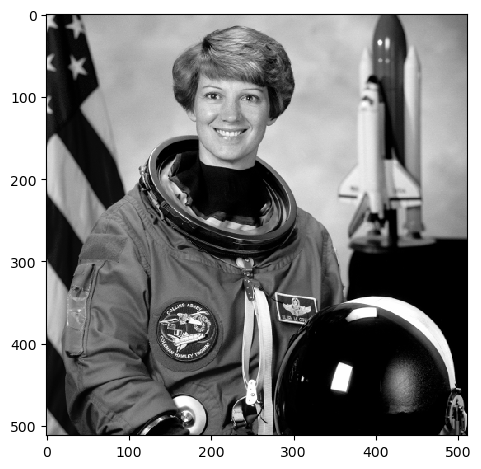

In [2]:
from skimage.io import imread, imshow
from skimage import data

astro = data.astronaut()
astro_gris = data.astronaut()[:,:,1]
imshow(astro_gris)

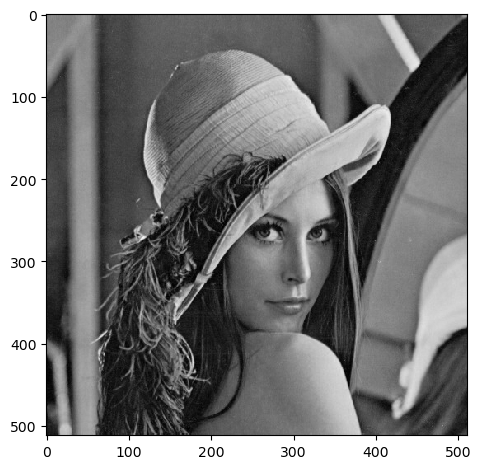

In [3]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

lena = imread('figs/lena.jpg')
lena_gris = lena[:,:,1]
imshow(lena_gris)

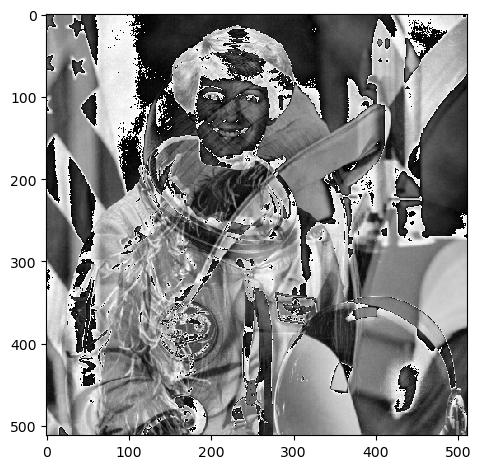

In [4]:
sum = astro_gris + lena_gris
imshow(sum)

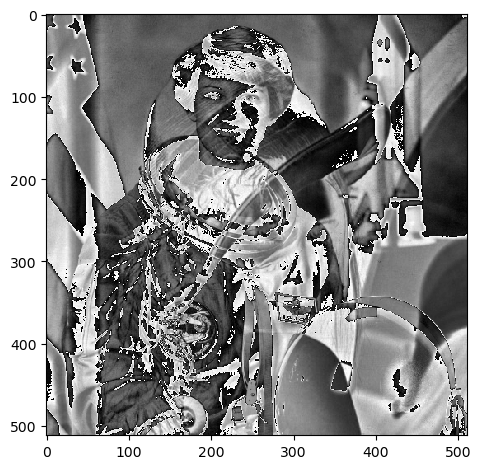

In [5]:
dif = astro_gris - lena_gris
imshow(dif)

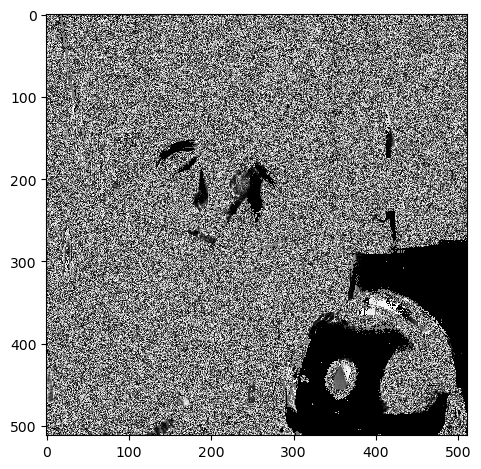

In [6]:
prod = astro_gris * lena_gris
imshow(prod)

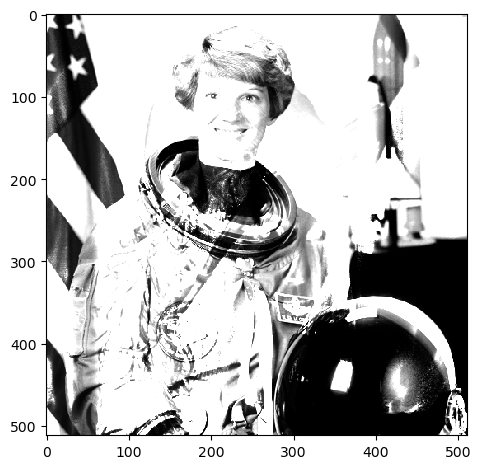

In [7]:
div = astro_gris / lena_gris
imshow(div)

### 2.6.4. Operaciones lógicas y de conjuntos


#### Operaciones básicas

Si $a$ es un elemento de $A$, entonces se puede escribir

$$ a \in A $$

Análogamente, si $a$ no es un elemento de $A$

$$ a \notin A $$

 El conjunto que no contiene elementos es llamado conjunto vacío y se denota por $\emptyset$

 un conjunto de notando por su contenido dentro de llaves $\{ \dot \}$. Por ejemplo

 $$ C = \left\{ c | c = -d, d \in D \right\} $$

 que quiere decir que $C$ es el conjunto de elementos $c$, tal que $C$ está formado por el negativo de cada uno de los elementos en el conjunto $D$

 Si cada elemento del conjunto $A$ también este elemento del conjunto $B$, entonces se dice que $A$ es un subconjunto de $B$, y se denota como

 $$ A \subseteq B $$

La unión de dos conjuntos $A$ y $B$ es un conjunto $C$ que contiene los elementos pertenecientes a $A$ o a $B$ o a ambos.

$$ C = A \cup B $$

Similarmente, el conjunto $D$ que consiste de los elementos que pertenecen a ambos conjuntos $A$ y $B$, se le llama intersección de $A$ y $B$

$$ A \cap B $$

Se dice que dos conjuntos $A$ y $B$ son disjuntos mutuamente exclusivos si no tienen elementos en común, es decir

$$ A \cap B = \emptyset $$

El espacio de muestra (también llamado conjunto universo) es el conjunto de todos los posibles elementos de todos los conjuntos en una aplicación.

El complemento de un conjunto $A$ es el conjunto de elementos que no están en $A$

$$ A^c = \{ w|w\notin A\} $$

A diferencia de dos conjuntos $A$ y $B$, como $A-B$, está definida como

$$ A-B = \{ w|w\in A, w\notin B\} = A \cap B^c $$

<center><img width=600 src='figs/conjuntos1.png'>

<center>

| Descripción   |      Expresiones |
|------------------------------------------|:-------------:|
| Operaciones entre el universo y conjuntos vacíos | $$\Omega^c = \emptyset $$ $$ \emptyset ^c = \Omega $$ $$ \Omega \cup \emptyset = \Omega $$  $$ \Omega \cap \emptyset = \emptyset $$ |
| Unión e intersección con el vacío y el universo | $$ A \cup \emptyset = A $$  $$ A \cap \emptyset = \emptyset $$  $$ A \cup \Omega = \Omega $$  $$ A\cap \Omega = A $$ |
| Unión e intersección de un conjunto con él mismo | $$ A \cup A = A $$ $$ A \cap A = A$$ |


<center>

| Descripción   |      Expresiones |
|------------------------------------------|:-------------:|
| Unión e intersección de un conjunto con su complemento | $$ A \cup A^c = \Omega $$  $$ A \cap A^c = \emptyset $$ | 
| Leyes conmutativas | $$ A \cup B = B \cup A $$ $$ A \cap B = B \cap A $$ |
| Leyes asociativas | $$ (A\cup B)\cup C = A \cup (B \cup C) $$  $$ (A\cap B)\cap C = A \cap (B\cap C) $$ |
| Leyes distributivas | $$ (A\cup B)\cap C = (A\cap C)\cup (B\cap C) $$ $$ (A\cap B)\cup C = (A\cup C)\cap (B\cup C) $$ |
| Leyes de DeMorgan | $$ (A\cup B)^c = A^c \cap B^c $$ $$ (A\cap B)^c = A^c \cup B^c $$ |

### 2.6.5. Ordenes parcial y estricto


El producto cartesiano de dos conjuntos $X$ y $Y$, de notado como $X \times Y$, es el conjunto de todos los pares ordenados en los cuales el primer elemento es miembro de el conjunto $X$ y el segundo componente es miembro del conjunto $Y$

$$
X\times Y = \left\{ (x,y) | x \in X, y \in Y \right\}
$$

Una relación (más precisamente, una relación binaria) en un conjunto $A$ es una colección de pares ordenados elementos de $A$. Esto es, una relación binaria es un subconjunto del producto cartesiano $A \times A$.

Una relación binaria entre dos conjuntos $A$ y $B$ es un subconjunto de $A\times B$.

Un órden parcial en un conjunto $S$ es una relación $\mathcal{R}$ en $S$, tal que $\mathcal{R}$ es
1. Reflexiva: para cualquier $a\in S, a\mathcal{R}a$
1. Transitiva: para cualquier $a,b,c \in S$, si $a\mathcal{R}b $ y $ b\mathcal{R}c $ entonces $a\mathcal{R}c $
1. Antisimétrica: para cualquier $ a,b \in S $, $ a\mathcal{R} b $ y $ b \mathcal{R} a $ implica que $a = b$

Un conjunto con un orden parcial se llama conjunto parcialmente ordenado.

Sea el símbolo $\preceq$ que denota una relación de órden parcial. Una expresión de la forma

$$ a_1 \preceq a_2 \preceq \cdots \preceq a_n $$

se lee como: *$a_1$ precede o es igual a $a_2$*, *$a_2$ precede o es igual a $a_3$*, etc. Trabajando con números, utilizamos símbolos conocidos como *menor o igual que* (denotado por $\leq$).

Un órden estricto en el conjunto $S$ es una relación $\mathcal{R}$ en $S$, tal que $\mathcal{R}$ es

1. Antireflexiva: para cualquier $a\in S, a \neg\mathcal{R}a $
1. Transitiva: para cualquier $a,b,c \in S$, si $a\mathcal{R}b $ y $ b\mathcal{R}c $ entonces $a\mathcal{R}c $

Un conjunto con un orden parcial se llama conjunto parcialmente ordenado.

Sea el símbolo $\prec$ que denota una relación de órden estricto. Una expresión de la forma

$$ a_1 \prec a_2 \prec \cdots \prec a_n $$

se lee como: *$a_1$ precede a $a_2$*, *$a_2$ precede a $a_3$*, etc. Trabajando con números, utilizamos símbolos conocidos como *menor que* (denotado por $<$).

### 2.6.6. Operaciones lógicas

Las operaciones lógicas tratan con variables y expresiones VERDADERAS (normalmente indicadas por 1) y FALSAS (normalmente indicadas por 0). Para nuestros propósitos, esto significa imágenes binarias compuestas por píxeles de primer plano (con valor 1) y un fondo compuesto por píxeles con valor 0.

Trabajamos con operadores lógicos y de conjuntos en imágenes binarias usando uno de dos enfoques básicos: 

1. podemos usar las coordenadas de regiones individuales de píxeles de primer plano en una sola imagen como conjuntos. Aquí, una imagen binaria se puede ver como un diagrama de Venn en el que las coordenadas de regiones individuales de píxeles de valor 1 se tratan como conjuntos.

2. podemos trabajar con uno o más imágenes del mismo tamaño y realizar operaciones lógicas entre los píxeles correspondientes en esas matrices. Aquí, realizamos operaciones lógicas en los píxeles de una imagen binaria, o en los píxeles correspondientes de dos o más imágenes binarias del mismo tamaño.


Los operadores lógicos se pueden definir en términos de tablas de verdad. 

<center>

| $$a$$ | $$b$$ | $$a\wedge b$$ | $$ a\vee b $$ | $$ \sim a $$ |
|---|---|:---:|:---:|:---:|
| 0 | 0 | 0 | 0 | 1 |
| 0 | 1 | 0 | 1 | 1 |
| 1 | 0 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 0 |



La operación lógica AND (también denominada $\wedge$) produce un 1 (VERDADERO) sólo cuando $a$ y $b$ son 1. De lo contrario, produce 0 (FALSO). De manera similar, el OR lógico ($\vee$) produce 1 cuando $a$ o $b$ o ambos son 1, y 0 en caso contrario. El operador NOT ($\sim$) se explica por sí mismo. 

Cuando se aplica a dos imágenes binarias, AND y OR operan en pares de píxeles correspondientes entre las imágenes. Es decir, son operadores por elementos en este contexto. 

Los operadores AND, OR y NOT son funcionalmente completos, en el sentido de que pueden usarse como base para construir cualquier otro operador lógico.

<center><img width=500 src='figs/logic_ops1.png'>

### 2.6.7. Operaciones espaciales

#### Operaciones de pixel individual

La operación más simple que realizamos en una imagen digital es alterar la intensidad de sus píxeles individualmente usando una función de transformación, $T$, de la forma

$$ s = T(z) $$

donde $z$ es la intensidad de un píxel en la imagen original y $s$ es la intensidad (mapeada) del píxel correspondiente en la imagen procesada. Esta transformación podría usarse, por ejemplo, para obtener el negativo de la imagen.

Text(0.5, 1.0, 'Imagen negativa')

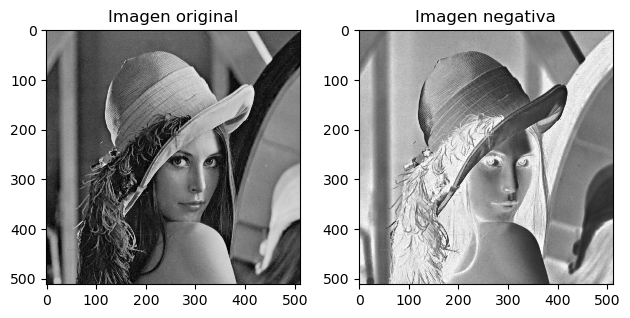

In [8]:
img = imread('figs/lena.jpg')
img = lena[:,:,1]
neg = 255 - img

plt.subplot(1,2,1), imshow(img)
plt.title('Imagen original')
plt.subplot(1,2,2), imshow(neg)
plt.title('Imagen negativa')

#### Operaciones de vecindario

Sea $S_{xy}$ el conjunto de coordenadas de una vecindad centrada en un punto arbitrario $(x, y)$ en una imagen $f$. El procesamiento de vecindad genera un píxel correspondiente en las mismas coordenadas en una imagen de salida (procesada) $g$, de modo que el valor de ese píxel se determina mediante una operación específica en la vecindad de píxeles en la imagen de entrada con coordenadas en el conjunto $S_{xy}$. 



Por ejemplo, supongamos que la operación especificada es calcular el valor promedio de los píxeles en una vecindad rectangular de tamaño $m \times n$ centrada en $(x, y)$. Las coordenadas de los píxeles en esta región son los elementos del conjunto $S_{xy}$. Podemos expresar esta operación promedio como

$$ 
g(x,y) = \frac{1}{mn}\sum _{(r,c)\in S_{xy}} f(r,c)
$$

donde $r$ y $c$ son las coordenadas de fila y columna de los píxeles cuyas coordenadas están en el conjunto $S_{xy}$. La imagen $g$ se crea variando las coordenadas $(x,y)$ de modo que el centro de la vecindad se mueva de píxel a píxel en la imagen $f$, y luego repitiendo la operación de vecindad en cada nueva ubicación.

<center><img width=600 src='figs/neigh_ops1.png'>

In [9]:
import matplotlib.pyplot as plt

def show_images(*images, titles=[], cols=2, cmap='gray', figsize=(10, 10)):
    """
    Display a list of images in a grid.
    Args:
        images (list): A list of images to display.
        titles (list): A list of titles for each image (optional).
        cols (int): The number of columns in the grid (default=2).
        cmap (str): The colormap to use (default='gray').
        figsize (tuple): The size of the figure (default=(10, 10)).
    """
    rows = len(images) // cols + (1 if len(images) % cols else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap=cmap)
            if titles is not None:
                ax.set_title(titles[i] if len(titles) > i else 'Figura {}'.format(i+1))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


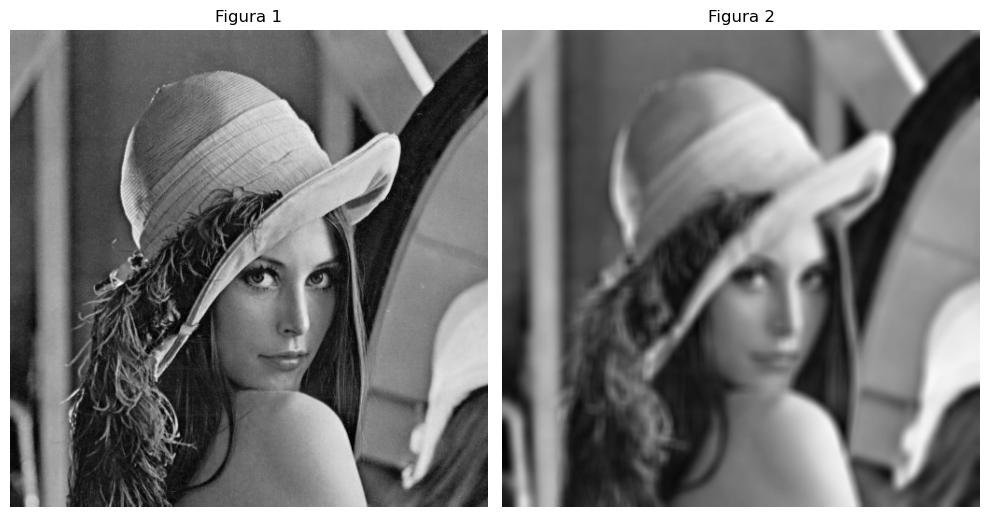

In [12]:
from scipy import ndimage as ndi

n = 11
mean_kernel = np.full((n, n), 1/n**2)

filtered_img = ndi.correlate(img, mean_kernel)

show_images(img, filtered_img )


### 2.6.8. Transformaciones geométricas


Utilizamos transformaciones geométricas para modificar la disposición espacial de los píxeles de una imagen. Estas transformaciones se denominan transformaciones de *lámina de goma* porque pueden considerarse análogas a “imprimir” una imagen en una lámina de goma y luego estirar o encoger la hoja de acuerdo con un conjunto predefinido de reglas. 

Las transformaciones geométricas de imágenes digitales constan de dos operaciones básicas:

1. Transformaciones espaciales de coordenadas.
1. Interpolación de la intensidad que asigna valores de intensidad a los pixeles transformados espacialmente.

La transformación de coordenadas puede ser expresada como

$$
\begin{bmatrix}
    x' \\ y'
\end{bmatrix} = \mathbf{T}
\begin{bmatrix}
    x \\ y
\end{bmatrix} =
\begin{bmatrix}
    t_{11} & t_{12} \\
    t_{21} & t_{22}
\end{bmatrix}
\begin{bmatrix}
    x \\ y
\end{bmatrix}
$$

donde $(x,y)$ son las coordenadas de píxeles de la imagen original y $(x′,y′)$ son las coordenadas de píxeles correspondientes de la imagen transformada. 

Nuestro interés está en las llamadas transformaciones afines, que incluyen escalado, traslación, rotación y corte. La característica clave de una transformación afín en 2-D es que conserva puntos, líneas rectas y planos. La ecuación anterior se puede utilizar para expresar las transformaciones que acabamos de mencionar, excepto la traslación, que requeriría agregar un vector bidimensional constante al lado derecho de la ecuación. Sin embargo, es posible utilizar coordenadas homogéneas para expresar las cuatro transformaciones afines utilizando una única matriz de 3 × 3 en la siguiente forma general:

$$
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix} = \mathbf{A}
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix} =
\begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    0      & 0      & 1
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
$$

Esta transformación puede escalar, rotar, trasladar o traslapar una imagen, dependiendo de los valores elegidos para los elementos de la matriz $\mathbf{A}$.

<center><img width=600 src='figs/transforms1.png'>

Una ventaja significativa de poder realizar todas las transformaciones utilizando la representación unificada, es que proporciona el marco para concatenar una secuencia de operaciones.

Por ejemplo, si queremos cambiar el tamaño de una imagen, rotarla y mover el resultado a alguna ubicación, simplemente formamos una matriz de 3 × 3 igual al producto de las matrices de escala, rotación y traducción.

## 2.7. Transformaciones de imágenes


Todos los enfoques de procesamiento de imágenes analizados hasta ahora operan directamente sobre los píxeles de una imagen de entrada; es decir, trabajan directamente en el dominio espacial. 

En algunos casos, las tareas de procesamiento de imágenes se formulan mejor transformando las imágenes de entrada, llevando la tarea especificada en un dominio de transformación y aplicando la transformación inversa para regresar al dominio espacial. 



Una clase esencial de transformadas lineales 2-D, denotada T(u,v), se puede expresar en la forma general

$$
T(u,v) = \sum_{x=0}^{M-1} \sum _{y=0}^{N-1} f(x,y)r(x,y,u,v) 
$$

donde $f(x,y)$ es una imagen de entrada, $r(x,y,u,v)$ se denomina núcleo de transformación directa y la ecuación se evalúa para $u = 0, 1, 2, ... , M − 1$ y $v = 0, 1, 2, ... , N − 1 $. Como antes, $x$ e $y$ son variables espaciales, mientras que $M$ y $N$ son las dimensiones de fila y columna de $f$. Las variables $u$ y $v$ se denominan variables de transformación. $T(u,v)$ se llama transformada directa de $f (x, y)$. 

Dado T (u, v), podemos recuperar f (x, y) usando la transformada inversa de T(u,v):

$$
f(x,y) = \sum_{u=0}^{M-1} \sum _{v=0}^{N-1} T(x,y)s(x,y,u,v) 
$$

para $x = 0, 1, 2, ... , M − 1$ y $y = 0, 1, 2, ... , N − 1$, donde $s( x, y, u, v)$ se denomina núcleo de transformación inversa. Juntas, las Ecs. anteriores se denominan *par de transformación*.

<center><img width=800 src='figs/transforms2.png'>

La naturaleza de una transformación está determinada por su núcleo. Una transformación de particular importancia en el procesamiento de imágenes digitales es la *transformada de Fourier*, que tiene los siguientes núcleos directo e inverso:

$$
r(x,y,u,v) = \mathcal{e} ^{-j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

$$
s(x,y,u,v) = \frac{1}{MN} \mathcal{e} ^{j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

donde $j = \sqrt{-1} $, por lo que dichos núcleos son funciones complejas. 

Al sustituir los núcleos anteriores en las formulaciones de transformación generales  nos dan el par de transformadas discretas de Fourier:

$$
T(u,v) = \sum_{x=0}^{M-1} \sum _{y=0}^{N-1} f(x,y) \mathcal{e} ^{-j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

$$
f(x,y) = \sum_{u=0}^{M-1} \sum _{v=0}^{N-1} T(x,y)\frac{1}{MN} \mathcal{e} ^{j2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

La figura muestra una imagen corrompida por interferencia periódica (sinusoidal).

<center><img width=600 src='figs/transforms3.png'>



* En el dominio espacial, la interferencia aparece como ondas de intensidad. 

* En el dominio de la frecuencia, la interferencia se manifiesta como ráfagas brillantes de intensidad, cuya ubicación está determinada por la frecuencia de la interferencia sinusoidal. 

    * Normalmente, las ráfagas son fácilmente observables en una imagen de la magnitud de la transformada de Fourier, $|T(u,v)|$. Los puntos brillantes que se muestran son los estallidos de intensidad. 

* La figura también muestra una imagen de máscara (llamada filtro) en la que el blanco y el negro representan 1 y 0, respectivamente. 

* Se muestra el resultado final, obtenido calculando la inversa de la transformada modificada. La interferencia ya no es visible y los detalles de la imagen nunca antes vistos ahora se vuelven bastante claros. 

# Fin de la Unidad 2